# Laboratorio 2

## Miembros
- Mariana Pineda Miranda - 202123330
- Joseph Linares Gutierrez - 202111887

In [967]:
import pandas as pd
from collections import Counter
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestNeighbors


pd.set_option('display.max_columns', None)   # todas las columnas
pd.set_option('display.width', None) 

## Cargar el archivo

In [968]:
dataTrain = pd.read_csv('data/train.csv', sep=';')
dataTrain.head()

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


In [969]:
dataTrain.shape

(14291, 19)

In [970]:
dataTrain.dtypes

ID                      object
Area                     int64
Perimetro              float64
LongitudEjeMayor       float64
LongitudEjeMenor       float64
RelacionAspecto         object
Excentricidad          float64
AreaConvexa            float64
DiametroEquivalente    float64
Medida                 float64
Solidez                float64
Redondez               float64
Compacidad             float64
FactorForma1           float64
FactorForma2           float64
FactorForma3           float64
FactorForma4           float64
DefectoVisible          object
MétodoSecado            object
dtype: object

In [971]:
dataTrain.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


- Area: hay valores negativos, es raro ya que el area no puede ser negativa. 
- Perimetro: hay valores negativos, es raro ya que el area no puede ser negativa. 
- LongitudEjeMayor y LongitudEjeMenor: tambien se tienen valores negativos
- Excentricidad: tampoco pueden haber valores negativos
- AreaConvexa, DiametroEquivalente, Medida, Solidez, Redondez, Compacidad: son medidas geometricas y no pueden tomar valores negativos.
- Factores Forma: derivan de medidas geometricas basicas por lo que se asume que tampoco pueden ser negativas

### 1. Completitud

In [972]:
#Contar valores faltantes por columna
dataTrain.isnull().sum()

ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64

In [973]:
dataTrain['Excentricidad'] = dataTrain['Excentricidad'].fillna(dataTrain['Excentricidad'].mean())
dataTrain['DiametroEquivalente'] = dataTrain['DiametroEquivalente'].fillna(dataTrain['DiametroEquivalente'].mean())
dataTrain['Solidez'] = dataTrain['Solidez'].fillna(dataTrain['Solidez'].mean())
dataTrain['Redondez'] = dataTrain['Redondez'].fillna(dataTrain['Redondez'].mean())
dataTrain['Compacidad'] = dataTrain['Compacidad'].fillna(dataTrain['Compacidad'].mean())
dataTrain['FactorForma1'] = dataTrain['FactorForma1'].fillna(dataTrain['FactorForma1'].mean())
dataTrain['FactorForma2'] = dataTrain['FactorForma2'].fillna(dataTrain['FactorForma2'].mean())
dataTrain['FactorForma3'] = dataTrain['FactorForma3'].fillna(dataTrain['FactorForma3'].mean())
dataTrain['FactorForma4'] = dataTrain['FactorForma4'].fillna(dataTrain['FactorForma4'].mean())
dataTrain.isnull().sum()


ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad             0
AreaConvexa            1423
DiametroEquivalente       0
Medida                    0
Solidez                   0
Redondez                  0
Compacidad                0
FactorForma1              0
FactorForma2              0
FactorForma3              0
FactorForma4              0
DefectoVisible         2935
MétodoSecado            587
dtype: int64

#### Si el DefectoVisible no es normal, es defectuoso

In [974]:
dataTrain['DefectoVisible'] = dataTrain['DefectoVisible'].fillna("Defectuoso")

#### Los otros son atributos unicos de cada grano por lo que no es posible promediarlos

In [975]:
# Elimino filas donde hayan valores faltantes
dataTrain = dataTrain.dropna()
dataTrain.isnull().sum()

ID                     0
Area                   0
Perimetro              0
LongitudEjeMayor       0
LongitudEjeMenor       0
RelacionAspecto        0
Excentricidad          0
AreaConvexa            0
DiametroEquivalente    0
Medida                 0
Solidez                0
Redondez               0
Compacidad             0
FactorForma1           0
FactorForma2           0
FactorForma3           0
FactorForma4           0
DefectoVisible         0
MétodoSecado           0
dtype: int64

In [976]:
dataTrain.shape

(10617, 19)

In [977]:
dataTrain.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,10617.000000,1.061700e+04,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000,10617.000000
mean,52894.511538,7.717391e+05,319.310867,201.928891,0.749368,53607.579919,252.547582,0.750423,0.986697,0.873649,0.799803,0.006567,0.001720,0.644096,0.994839
std,29404.297853,3.244805e+05,86.512725,45.624883,0.097522,29859.767126,56.434541,0.050843,0.027444,0.059434,0.066019,0.001128,0.000575,0.098686,0.019769
min,-38311.000000,-1.012143e+06,-421.444657,-200.838672,-0.815195,-62720.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002157,-0.683269,-0.995589
25%,36266.000000,6.768250e+05,252.931411,175.855016,0.717992,36658.000000,219.245553,0.719767,0.986423,0.845195,0.765531,0.006036,0.001195,0.585497,0.994107
50%,44515.000000,7.699720e+05,295.933689,192.350377,0.760471,45007.000000,246.532127,0.760838,0.987496,0.873080,0.799242,0.006572,0.001712,0.643183,0.996059
75%,60813.000000,9.525540e+05,376.031819,216.069980,0.807172,61674.000000,268.831452,0.786902,0.989637,0.911981,0.832832,0.007207,0.002134,0.694595,0.997767
max,248424.000000,1.921685e+06,738.144502,460.198497,0.908167,251082.000000,562.408446,0.866195,0.994082,0.986812,0.987303,0.010451,0.003665,0.974767,0.999709


### 2. Consistencia

In [978]:
dataTrain['RelacionAspecto'].value_counts()

RelacionAspecto
Alargado      9231
Redondeado    1355
alargado        24
redondeado       7
Name: count, dtype: int64

In [979]:
# En las columnas de texto poner todo en minuscula 
# Relacion Aspecto
dataTrain['RelacionAspecto'] = dataTrain['RelacionAspecto'].str.lower()
dataTrain['RelacionAspecto'].unique()


array(['alargado', 'redondeado'], dtype=object)

In [980]:
dataTrain['DefectoVisible'].value_counts()

DefectoVisible
Normal        6742
Defectuoso    2190
normal        1685
Name: count, dtype: int64

In [981]:
# Defecto Visible
dataTrain['DefectoVisible'] = dataTrain['DefectoVisible'].str.lower()
dataTrain['DefectoVisible'].unique()


array(['defectuoso', 'normal'], dtype=object)

In [982]:
dataTrain['MétodoSecado'].value_counts()

MétodoSecado
Lavado     4893
Natural    3536
lavado     1224
natural     905
Honey        47
honey        12
Name: count, dtype: int64

In [983]:
# Metodo secado
dataTrain['MétodoSecado'] = dataTrain['MétodoSecado'].str.lower()
dataTrain['MétodoSecado'].unique()

array(['natural', 'lavado', 'honey'], dtype=object)

### 3. Unicidad

In [984]:
# Borrar filas que sean exactamente iguales
dataTrain.duplicated().sum()
dataTrain = dataTrain.drop_duplicates()
dataTrain.shape

(10108, 19)

In [985]:
# Ver si hay granos con ID igual 
ids_repetidos = dataTrain['ID'][dataTrain['ID'].duplicated()].unique()
ids_repetidos

array(['G006598', 'G010313', 'G005438', 'G010235', 'G011154', 'G004864',
       'G010867', 'G001394'], dtype=object)

In [986]:
dataTrain.duplicated().sum()

np.int64(0)

In [987]:
duplicados = dataTrain[dataTrain.duplicated(subset=['ID'], keep=False)]
duplicados = duplicados.sort_values(by='ID')
duplicados

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
1061,G001394,41626,740681.0,265.121779,200.072797,alargado,0.749977,41933.0,230.217005,0.763094,0.992679,0.953481,0.868344,0.006369,0.002234,0.754022,0.999175,defectuoso,lavado
13901,G001394,41626,740681.0,265.121779,200.072797,alargado,0.749977,41933.0,-230.217005,0.763094,0.992679,0.953481,0.868344,0.006369,0.002234,0.754022,0.999175,defectuoso,lavado
4140,G004864,77062,1073309.0,-421.444657,234.381902,alargado,0.831089,77975.0,313.238545,0.778829,0.988291,0.840622,0.743250,0.006560,0.001029,0.552420,0.993312,normal,lavado
11740,G004864,77062,1073309.0,421.444657,234.381902,alargado,0.831089,77975.0,313.238545,0.778829,0.988291,0.840622,0.743250,0.006560,0.001029,0.552420,0.993312,normal,lavado
2284,G005438,93494,1160772.0,447.711193,267.388570,alargado,0.802067,94456.0,345.022112,0.710052,0.989815,0.871966,0.770635,0.004789,0.001042,0.593879,0.994382,normal,natural
9254,G005438,93494,1160772.0,447.711193,267.388570,alargado,0.802067,94456.0,345.022112,0.710052,0.989815,0.871966,0.770635,-0.004789,0.001042,0.593879,0.994382,normal,natural
1989,G006598,54860,911589.0,369.730500,-189.842876,alargado,0.858112,55468.0,264.291357,0.691838,0.986774,0.829598,0.714822,0.006740,0.001085,0.510970,0.995145,normal,natural
6804,G006598,54860,911589.0,369.730500,189.842876,alargado,0.858112,55468.0,264.291357,0.691838,0.986774,0.829598,0.714822,0.006740,0.001085,0.510970,0.995145,normal,natural
3942,G010235,24590,-575308.0,209.879655,149.617668,alargado,0.701293,24921.0,176.943382,0.755453,0.986774,0.933614,0.843071,0.006560,0.002660,0.710768,0.997047,normal,lavado
10426,G010235,24590,575308.0,209.879655,149.617668,alargado,0.701293,24921.0,176.943382,0.755453,0.986774,0.933614,0.843071,0.006560,0.002660,0.710768,0.997047,normal,lavado


### Realizando un analisis de los duplicados podemos ver que la mayoria se duplican porque tienen un valor positivo y uno negativo por lo que en consistencia se va a tratar esto

### 4. Validez

### Ver donde hay valores negativos

In [988]:
dataTrain.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,10108.000000,1.010800e+04,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000
mean,52860.508409,7.706384e+05,319.161688,201.915705,0.749083,53573.467254,252.488385,0.750131,0.986669,0.873572,0.799955,0.006566,0.001720,0.644314,0.994829
std,29319.686122,3.249177e+05,86.348361,45.603307,0.097980,29772.196453,56.390133,0.050914,0.028114,0.059717,0.066252,0.001130,0.000575,0.098655,0.020243
min,-38311.000000,-1.012143e+06,-421.444657,-200.838672,-0.815195,-62720.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002157,-0.683269,-0.995589
25%,36253.000000,6.764070e+05,252.797787,175.808197,0.717893,36640.500000,219.098142,0.719398,0.986402,0.844814,0.765780,0.006033,0.001196,0.585960,0.994121
50%,44487.000000,7.694720e+05,295.807268,192.351278,0.760291,44977.500000,246.547620,0.760383,0.987499,0.873080,0.799242,0.006570,0.001712,0.643183,0.996067
75%,60849.750000,9.521825e+05,375.744506,216.179289,0.807079,61715.000000,268.866965,0.786825,0.989637,0.911967,0.832907,0.007207,0.002133,0.694659,0.997771
max,248424.000000,1.921685e+06,738.144502,460.198497,0.908167,251082.000000,562.408446,0.866195,0.994082,0.986812,0.987303,0.010451,0.003665,0.974767,0.999709


In [989]:
dataTrain.shape

(10108, 19)

In [990]:
negativos_por_columna = (dataTrain['Perimetro'] < 0).sum()
negativos_por_columna

np.int64(4)

In [991]:
dataTrain = dataTrain[dataTrain['Area'] >= 0]
dataTrain = dataTrain[dataTrain['Perimetro'] >= 0]
dataTrain = dataTrain[dataTrain['LongitudEjeMayor'] >= 0]
dataTrain = dataTrain[dataTrain['LongitudEjeMenor'] >= 0]
dataTrain = dataTrain[dataTrain['Excentricidad'] >= 0]
dataTrain = dataTrain[dataTrain['AreaConvexa'] >= 0]
dataTrain = dataTrain[dataTrain['DiametroEquivalente'] >= 0]
dataTrain = dataTrain[dataTrain['Medida'] >= 0]
dataTrain = dataTrain[dataTrain['Solidez'] >= 0]
dataTrain = dataTrain[dataTrain['Redondez'] >= 0]
dataTrain = dataTrain[dataTrain['Compacidad'] >= 0]
dataTrain = dataTrain[dataTrain['FactorForma1'] >= 0]
dataTrain = dataTrain[dataTrain['FactorForma2'] >= 0]
dataTrain = dataTrain[dataTrain['FactorForma3'] >= 0]
dataTrain = dataTrain[dataTrain['FactorForma4'] >= 0]

dataTrain.shape

(10060, 19)

In [992]:
# Volvemos a verificar si se resolvio el problema de los duplicados
duplicados = dataTrain[dataTrain.duplicated(subset=['ID'], keep=False)]
duplicados = duplicados.sort_values(by='ID')
duplicados

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado


In [993]:
dataTrain.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,10060.000000,1.006000e+04,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000
mean,52872.188668,7.714052e+05,319.346496,202.073968,0.750008,53587.723658,252.835719,0.750300,0.987063,0.873906,0.800470,0.006574,0.001721,0.644625,0.995029
std,29299.105964,3.231226e+05,85.559200,44.916614,0.090217,29747.498867,54.895408,0.048552,0.004280,0.054672,0.060356,0.001082,0.000572,0.097100,0.004193
min,20420.000000,5.536000e+02,183.601165,122.512653,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002778,0.000564,0.416499,0.947687
25%,36261.750000,6.767920e+05,252.810807,175.830726,0.717939,36648.250000,219.171496,0.719465,0.986409,0.844830,0.765862,0.006034,0.001198,0.586032,0.994122
50%,44487.000000,7.697985e+05,295.813056,192.371581,0.760424,44986.000000,246.603130,0.760424,0.987499,0.873080,0.799242,0.006571,0.001712,0.643183,0.996071
75%,60818.250000,9.521560e+05,375.744506,216.179289,0.807066,61687.000000,268.974684,0.786839,0.989641,0.911936,0.832993,0.007208,0.002133,0.694712,0.997771
max,248424.000000,1.921685e+06,738.144502,460.198497,0.908167,251082.000000,562.408446,0.866195,0.994082,0.986812,0.987303,0.010451,0.003665,0.974767,0.999709


##### Ya no hay valores negativos

### 5. Convertir variables categoricas en columnas de 1 y 0

In [994]:
dataTrain = pd.get_dummies(dataTrain, columns=['RelacionAspecto', 'MétodoSecado', 'DefectoVisible'], dtype = int)
dataTrain.columns

Index(['ID', 'Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor',
       'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida',
       'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2',
       'FactorForma3', 'FactorForma4', 'RelacionAspecto_alargado',
       'RelacionAspecto_redondeado', 'MétodoSecado_honey',
       'MétodoSecado_lavado', 'MétodoSecado_natural',
       'DefectoVisible_defectuoso', 'DefectoVisible_normal'],
      dtype='object')

In [995]:
dataTrain.head()

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,RelacionAspecto_alargado,RelacionAspecto_redondeado,MétodoSecado_honey,MétodoSecado_lavado,MétodoSecado_natural,DefectoVisible_defectuoso,DefectoVisible_normal
1,G007234,62764,1003767.0,409.207082,198.330199,0.749977,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,1,0,0,0,1,1,0
2,G007054,59965,994266.0,389.088529,197.967275,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,1,0,0,0,1,0,1
3,G006619,55035,917.6,379.346822,185.390577,0.872446,55591.0,253.001741,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,1,0,0,1,0,0,1
4,G013353,39324,737773.0,262.520242,191.176858,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,1,0,0,1,0,0,1
5,G006127,50654,879938.0,357.233899,181.407743,0.861468,51251.0,253.958020,0.634857,0.988351,0.822090,0.710901,0.007052,0.001111,0.643183,0.995211,1,0,0,0,1,1,0


## Algoritmo 1: K-means (Mariana Pineda Miranda)

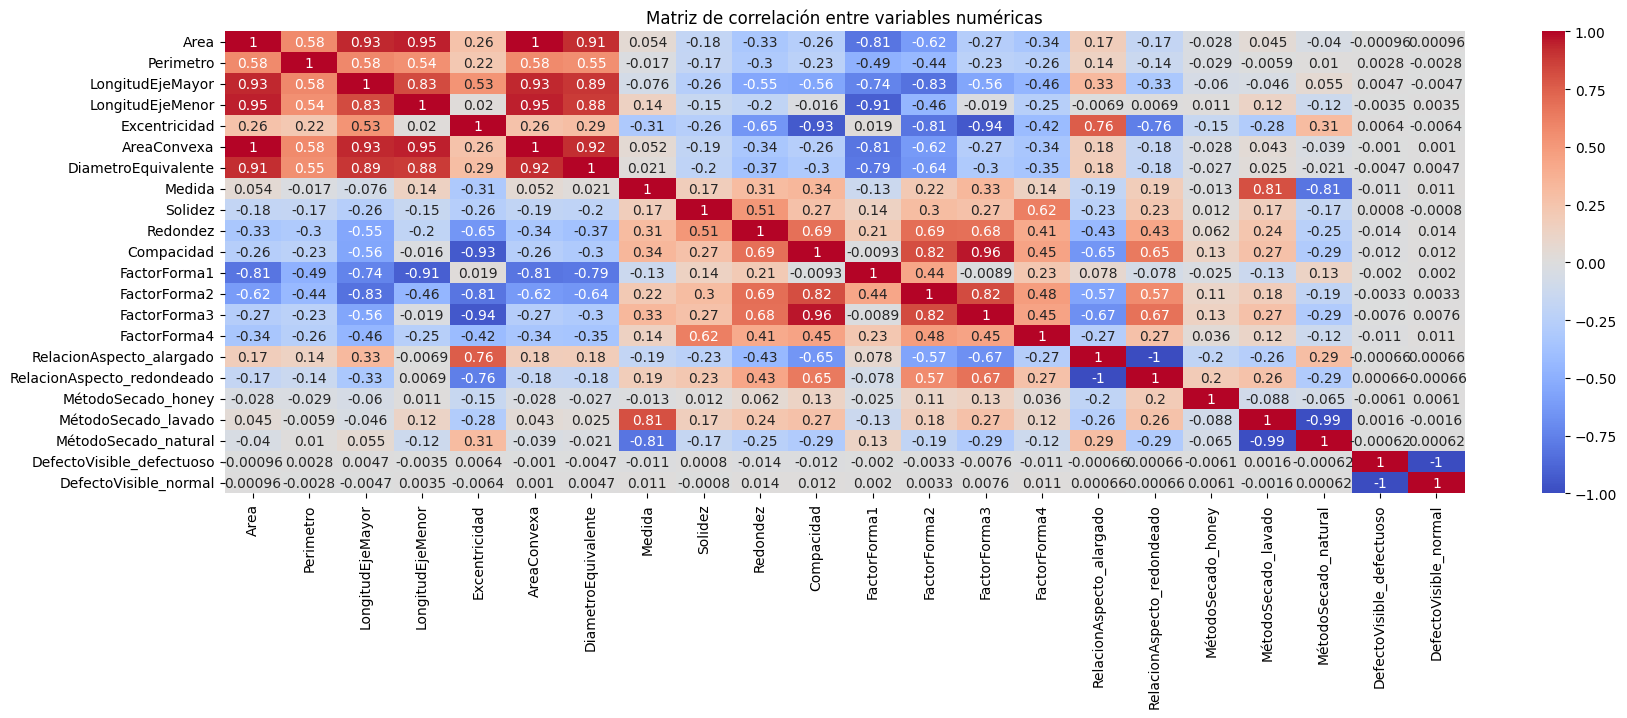

In [996]:
num_cols = dataTrain.select_dtypes(include=[np.number]).columns.tolist()

corr = dataTrain[num_cols].corr()
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


In [997]:
columnasusar = ["Area", "Perimetro", "Excentricidad", "Medida", "Solidez", "Redondez", "FactorForma4"]

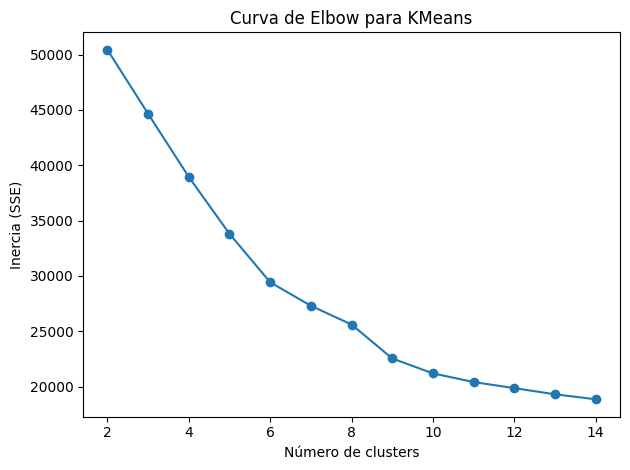

In [998]:
X = dataTrain[columnasusar]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sse = []
k_range = range(2, 15)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)
plt.figure()
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (SSE)')
plt.title('Curva de Elbow para KMeans')
plt.tight_layout()
plt.show()

In [999]:
opt_k = 10
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sils = []
for train_idx, test_idx in kf.split(X_scaled):
    model = KMeans(n_clusters=opt_k, random_state=42).fit(X_scaled[train_idx])
    preds = model.predict(X_scaled[test_idx])
    sils.append(silhouette_score(X_scaled[test_idx], preds))
print(f"Silhouette promedio (KFold, k={opt_k}): {np.mean(sils):.3f}")

Silhouette promedio (KFold, k=10): 0.247


In [1000]:
kmeans = KMeans(n_clusters=opt_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [1001]:
X_plot = X.copy()
X_plot['Cluster'] = clusters
print(X_plot['Cluster'].value_counts())

Cluster
6    2187
8    1926
1    1405
3    1348
7     813
0     787
4     623
5     522
9     348
2     101
Name: count, dtype: int64


### Gráfico de silueta

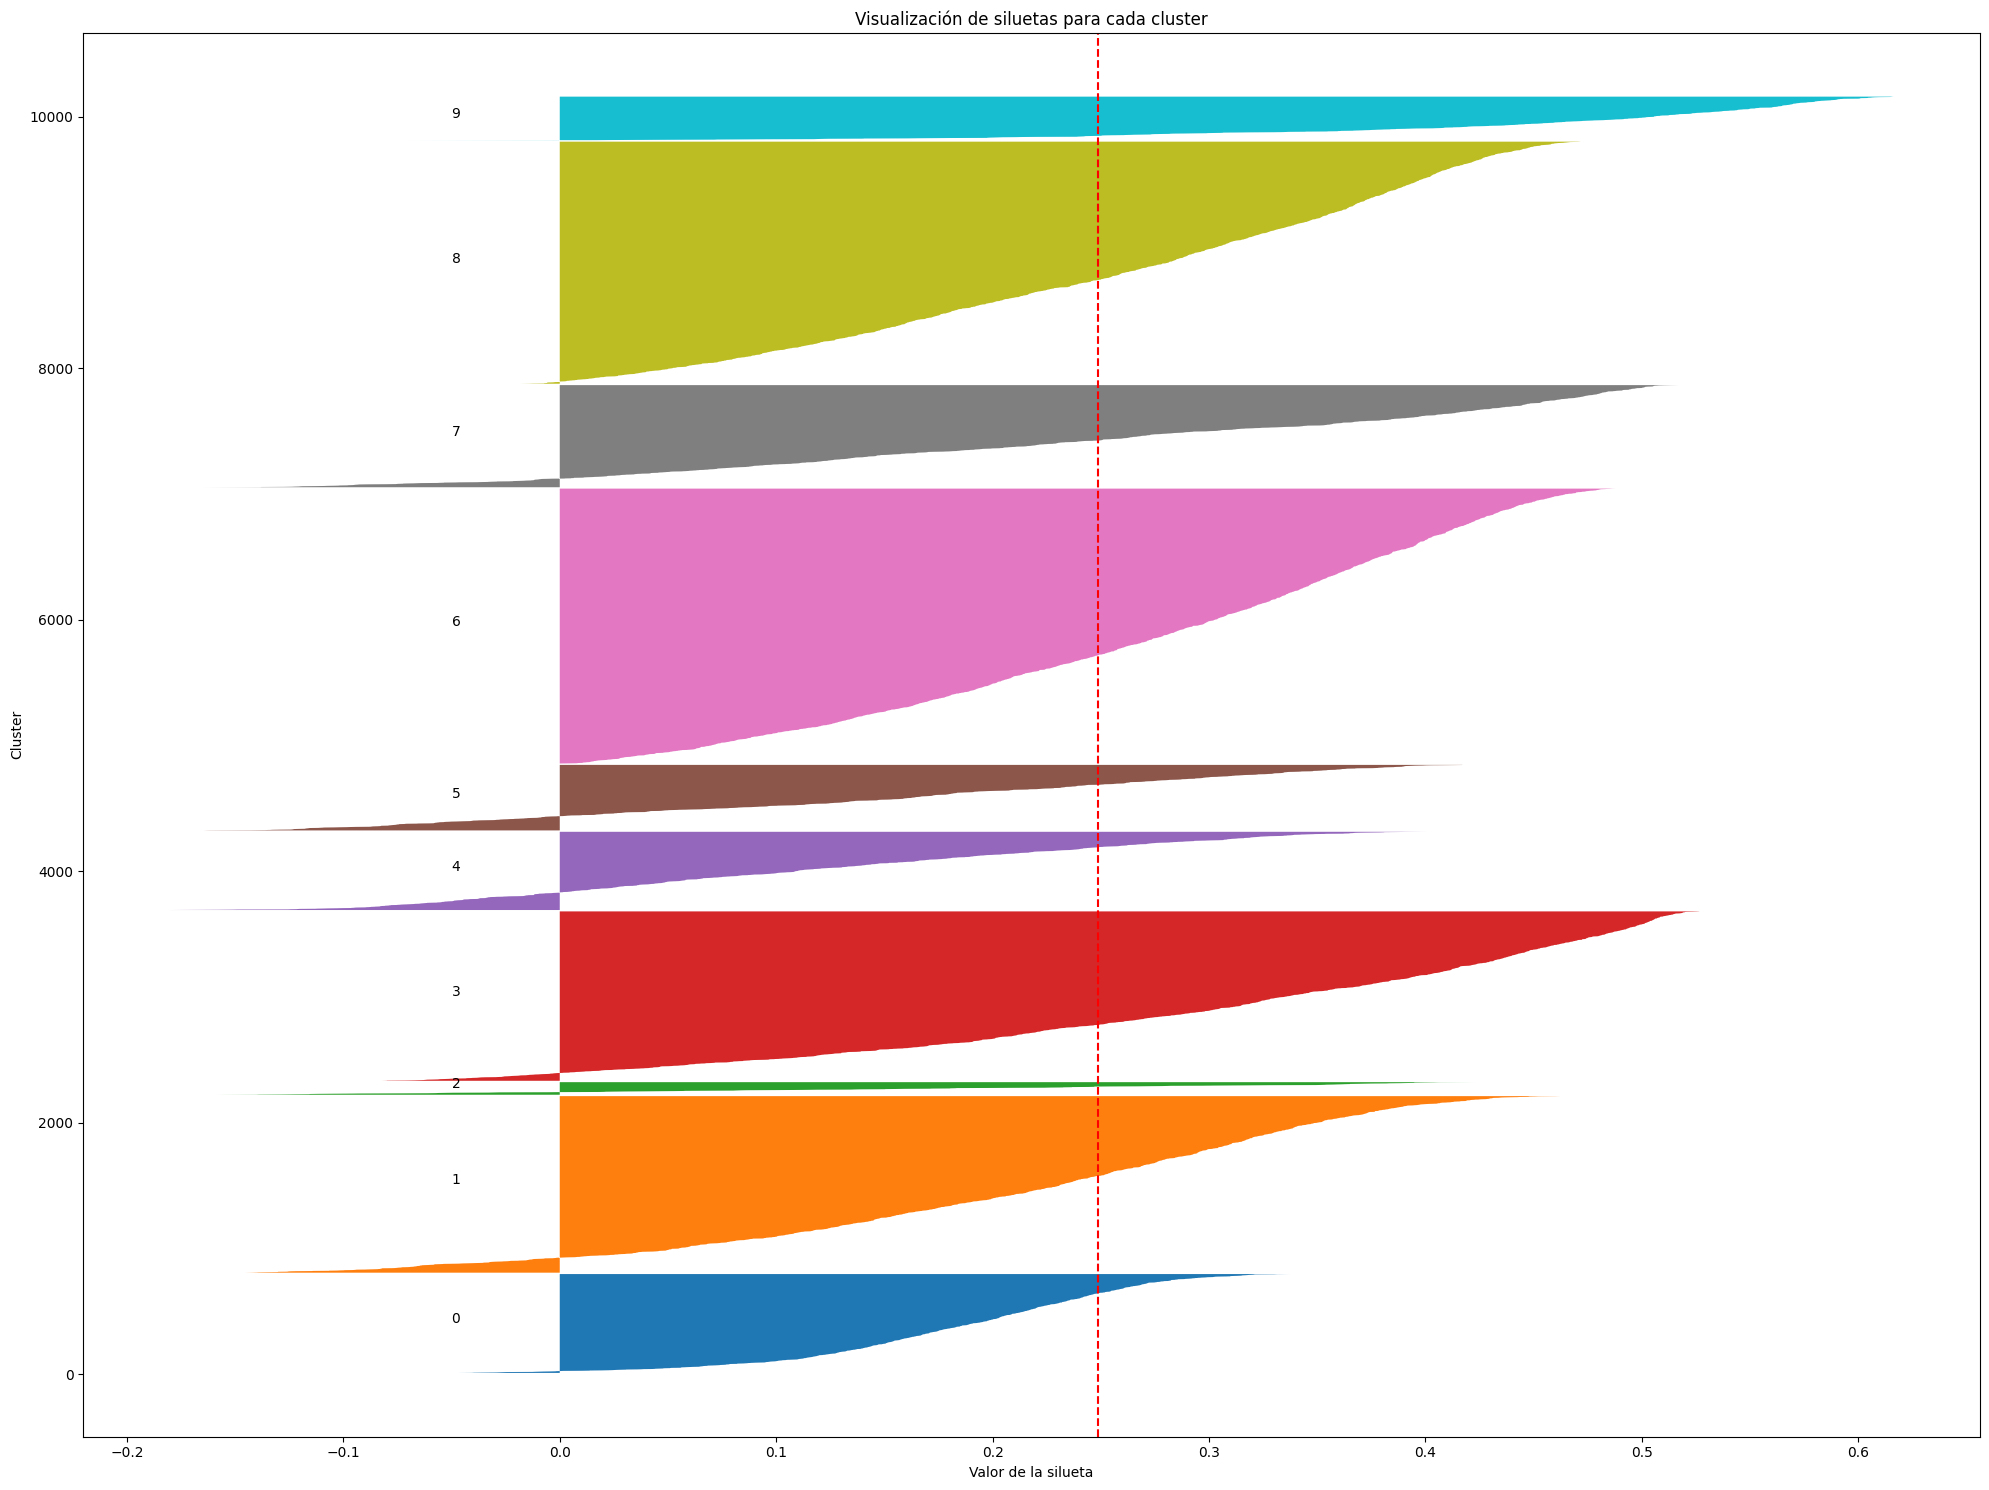

In [1002]:
cluster_labels = kmeans.labels_
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
plt.figure(figsize=(20, 15))
y_lower = 10
for i in range(opt_k):
    ith = silhouette_vals[cluster_labels == i]
    ith.sort()
    size_i = ith.shape[0]
    y_upper = y_lower + size_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith)
    plt.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Promedio: {silhouette_avg:.2f}")
plt.xlabel("Valor de la silueta")
plt.ylabel("Cluster")
plt.title("Visualización de siluetas para cada cluster")
plt.tight_layout()
plt.show()

In [1003]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns)
centroids_df

,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,FactorForma4
0,-0.007757,-2.384823,0.200771,0.068755,0.089873,-0.026793,0.105947
1,0.438555,0.677117,0.773200,0.617451,0.097961,-0.604977,-0.317687
2,0.411263,0.442709,0.857877,-0.745887,-4.931880,-1.294984,-5.057101
3,-0.484544,-0.336866,-1.951188,0.464368,0.680405,1.223921,0.728779
4,0.483806,0.769580,0.076922,-0.167633,-1.462761,-1.652745,0.123748
5,0.478793,0.526823,0.696844,-0.224286,-1.552204,-0.654248,-2.202346
6,-0.520205,-0.163384,-0.098753,0.697921,0.345520,0.501913,0.393216
7,0.107245,0.394460,1.175627,-2.039312,-0.035032,-1.201251,-0.289299
8,-0.488110,-0.122198,0.037444,-0.687160,0.190021,0.338194,0.295147
9,4.140289,2.449472,0.217236,0.587155,0.002777,-0.141448,-0.659034


In [1004]:
variation = centroids_df.max() - centroids_df.min()
variation.sort_values(ascending=False)

FactorForma4     5.785880
Solidez          5.612286
Perimetro        4.834296
Area             4.660494
Excentricidad    3.126815
Redondez         2.876666
Medida           2.737232
dtype: float64

### Features mas importantes por Cluster

In [1005]:
for i in range(centroids_df.shape[0]):
    cluster = centroids_df.iloc[i]
    top_features = cluster.abs().sort_values(ascending=False).head(3)
    print(f"Cluster {i}:")
    print(top_features)
    print()

Cluster 0:
Perimetro        2.384823
Excentricidad    0.200771
FactorForma4     0.105947
Name: 0, dtype: float64

Cluster 1:
Excentricidad    0.773200
Perimetro        0.677117
Medida           0.617451
Name: 1, dtype: float64

Cluster 2:
FactorForma4    5.057101
Solidez         4.931880
Redondez        1.294984
Name: 2, dtype: float64

Cluster 3:
Excentricidad    1.951188
Redondez         1.223921
FactorForma4     0.728779
Name: 3, dtype: float64

Cluster 4:
Redondez     1.652745
Solidez      1.462761
Perimetro    0.769580
Name: 4, dtype: float64

Cluster 5:
FactorForma4     2.202346
Solidez          1.552204
Excentricidad    0.696844
Name: 5, dtype: float64

Cluster 6:
Medida      0.697921
Area        0.520205
Redondez    0.501913
Name: 6, dtype: float64

Cluster 7:
Medida           2.039312
Redondez         1.201251
Excentricidad    1.175627
Name: 7, dtype: float64

Cluster 8:
Medida      0.687160
Area        0.488110
Redondez    0.338194
Name: 8, dtype: float64

Cluster 9:
Area    

## Algoritmo 2: DBSCAN (Mariana Pineda)

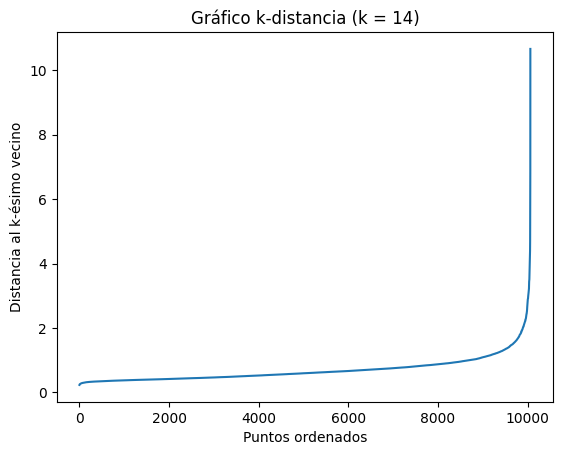

In [1006]:
min_samples = max(5, 2 * X_scaled.shape[1])

nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
dists, _ = nn.kneighbors(X_scaled)

k_dists = np.sort(dists[:, -1])

plt.figure()
plt.plot(k_dists)
plt.title(f'Gráfico k-distancia (k = {min_samples})')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al k-ésimo vecino')
plt.show()

In [1046]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [1047]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

Número de clusters encontrados: 3


In [1048]:
sil_score = silhouette_score(X_scaled, labels)
print(f"Coeficiente de Silhouette: {sil_score:.3f}")
dbi = davies_bouldin_score(X_scaled, labels)
print("Davies-Bouldin:", dbi)


Coeficiente de Silhouette: 0.214
Davies-Bouldin: 1.3251438275686136


In [1049]:
series = pd.Series(labels)
conteo = series.value_counts().sort_index()
total = len(labels)
conteo

-1     108
 0    9021
 1     901
 2      30
Name: count, dtype: int64

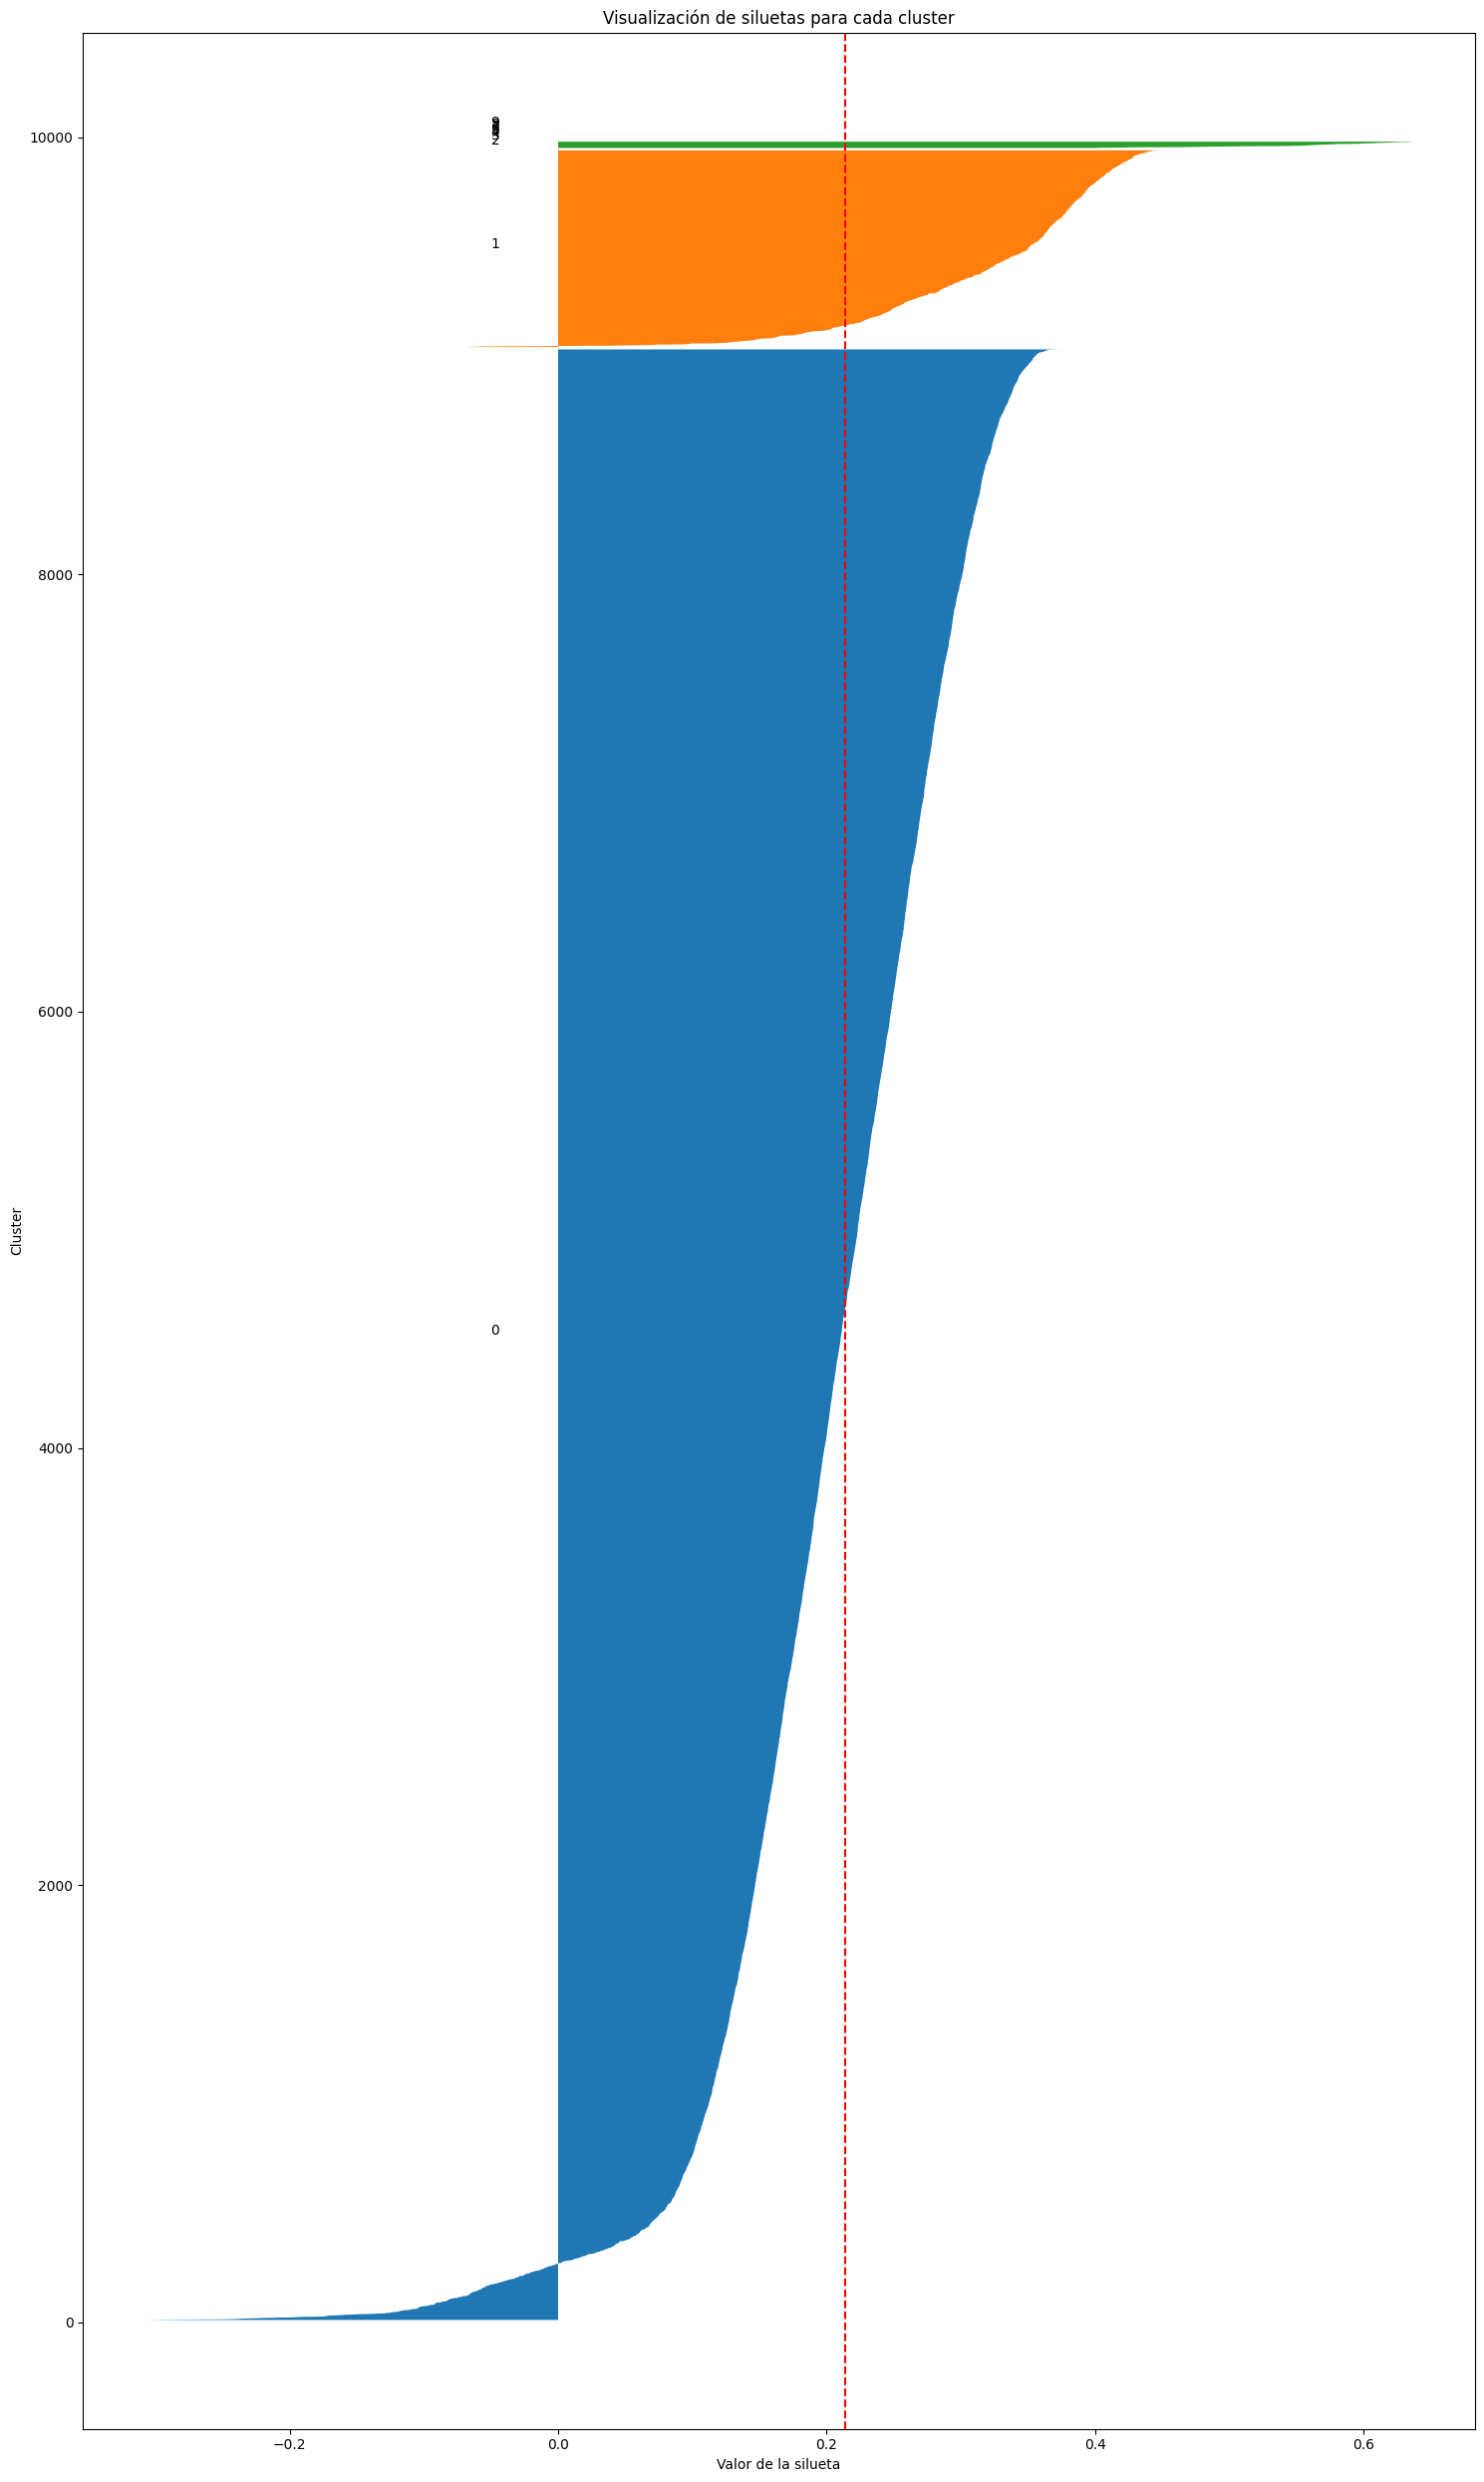

In [1050]:
cluster_labels = labels
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
plt.figure(figsize=(15, 25))
y_lower = 10
for i in range(opt_k):
    ith = silhouette_vals[cluster_labels == i]
    ith.sort()
    size_i = ith.shape[0]
    y_upper = y_lower + size_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith)
    plt.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Promedio: {silhouette_avg:.2f}")
plt.xlabel("Valor de la silueta")
plt.ylabel("Cluster")
plt.title("Visualización de siluetas para cada cluster")
plt.tight_layout()
plt.show()

In [1051]:
datosDBSCAN = dataTrain.copy()
datosDBSCAN["cluster"] = labels

In [1052]:
datosDBSCAN.head(5)

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,RelacionAspecto_alargado,RelacionAspecto_redondeado,MétodoSecado_honey,MétodoSecado_lavado,MétodoSecado_natural,DefectoVisible_defectuoso,DefectoVisible_normal,cluster
1,G007234,62764,1003767.0,409.207082,198.330199,0.749977,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,1,0,0,0,1,1,0,0
2,G007054,59965,994266.0,389.088529,197.967275,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,1,0,0,0,1,0,1,0
3,G006619,55035,917.6,379.346822,185.390577,0.872446,55591.0,253.001741,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,1,0,0,1,0,0,1,1
4,G013353,39324,737773.0,262.520242,191.176858,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,1,0,0,1,0,0,1,0
5,G006127,50654,879938.0,357.233899,181.407743,0.861468,51251.0,253.958020,0.634857,0.988351,0.822090,0.710901,0.007052,0.001111,0.643183,0.995211,1,0,0,0,1,1,0,0


In [1053]:
resumen = datosDBSCAN.groupby("cluster").mean(numeric_only=True)
resumen

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,RelacionAspecto_alargado,RelacionAspecto_redondeado,MétodoSecado_honey,MétodoSecado_lavado,MétodoSecado_natural,DefectoVisible_defectuoso,DefectoVisible_normal
cluster,,,,,,,,,,,,,,,,,,,,,,
-1,76447.648148,728695.165278,389.857907,232.593064,0.771194,78804.935185,291.190900,0.725367,0.969279,0.788695,0.775134,0.006222,0.001405,0.601159,0.980455,0.870370,0.129630,0.046296,0.388889,0.564815,0.250000,0.750000
0,52651.189558,851440.638067,318.582975,201.796585,0.749494,53352.202306,252.392643,0.750467,0.987234,0.874794,0.800874,0.006579,0.001726,0.645316,0.995152,0.870524,0.129476,0.005099,0.574770,0.420131,0.204079,0.795921
1,48463.462819,826.602098,309.896418,195.640777,0.752050,49087.370699,246.485592,0.750735,0.987445,0.875365,0.799500,0.006670,0.001740,0.643217,0.995602,0.875694,0.124306,0.007769,0.571587,0.420644,0.211987,0.788013
2,166863.700000,1552.045667,578.913677,368.824537,0.766945,168787.633333,438.705526,0.776800,0.988318,0.869842,0.799341,0.003484,0.000923,0.635564,0.993366,1.000000,0.000000,0.000000,0.733333,0.266667,0.066667,0.933333
